### Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import pearsonr
import pickle
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
df=pd.read_excel('Customer Raw data.xlsx',sheet_name='Unbxd Query performance')

### Displaying basic information about the dataset:

In [3]:
df.head()

,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0


In [4]:
df.shape

(500, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   query          500 non-null    object 
 1   hits           500 non-null    int64  
 2   clicks         500 non-null    int64  
 3   clickThroughs  500 non-null    int64  
 4   ctr            500 non-null    float64
 5   carts          500 non-null    int64  
 6   orders         500 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hits,500.0,61.670,191.192464,14.0,19.00,26.00,50.00,3971.0
clicks,500.0,99.620,143.261157,0.0,27.00,49.00,106.00,1360.0
clickThroughs,500.0,30.638,45.390523,0.0,10.00,15.00,29.00,447.0
ctr,500.0,56.634,19.599160,0.0,42.86,60.87,71.43,100.0
carts,500.0,16.276,62.749620,0.0,2.00,6.00,16.00,1330.0
orders,500.0,0.622,1.357498,0.0,0.00,0.00,1.00,13.0


### Checking for null values:

In [7]:
df.isnull().sum()

query            0
hits             0
clicks           0
clickThroughs    0
ctr              0
carts            0
orders           0
dtype: int64

In [8]:
df['query'].nunique()

500

In [9]:
df['orders'].nunique()

11

In [10]:
df.corr()

,hits,clicks,clickThroughs,ctr,carts,orders
hits,1.000000,0.392647,0.395261,-0.114670,0.071855,0.166429
clicks,0.392647,1.000000,0.960224,0.234909,0.249199,0.564942
clickThroughs,0.395261,0.960224,1.000000,0.249364,0.214433,0.572072
ctr,-0.114670,0.234909,0.249364,1.000000,0.056118,0.145883
carts,0.071855,0.249199,0.214433,0.056118,1.000000,0.159887
orders,0.166429,0.564942,0.572072,0.145883,0.159887,1.000000


### From this heatmap of correlation we can understand how each variable is linearly related to another variable

### It is cause and effect.

<AxesSubplot:>

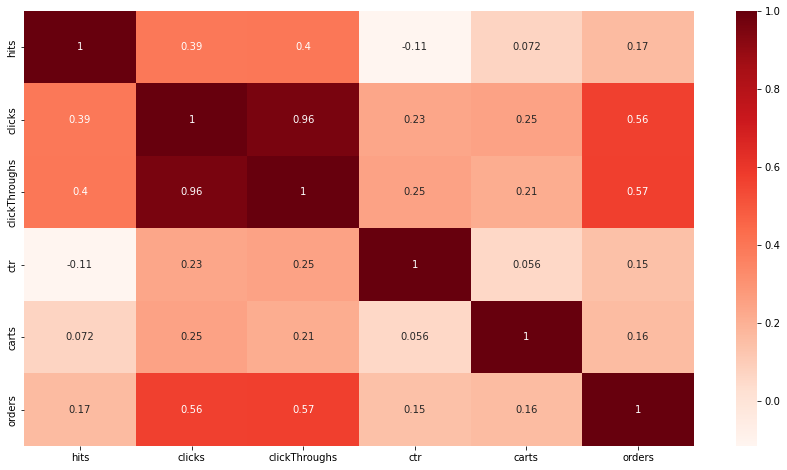

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,cmap='Reds')

### A histogram is basically used as accurate method for the graphical representation of numerical data distribution.

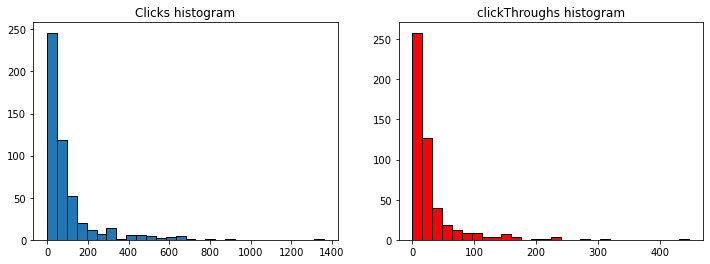

In [12]:
# plt.figure(figsize=(12,8))
# sns.histplot(df['clicks'],bins=28, edgecolor='k')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].hist(df['clicks'], bins=28, edgecolor='k')
ax[0].set_title('Clicks histogram')
    
ax[1].hist(df['clickThroughs'], bins=28, color = 'red', edgecolor='k')
ax[1].set_title('clickThroughs histogram');

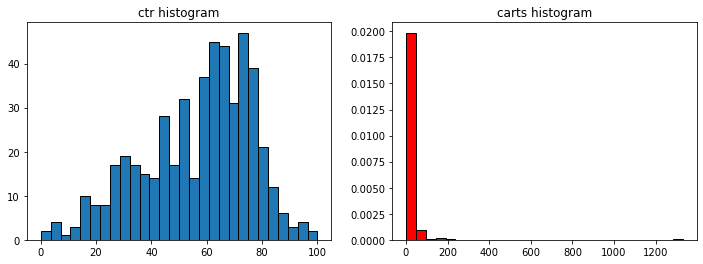

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].hist(df['ctr'], bins=28, edgecolor='k')
ax[0].set_title('ctr histogram')
    
ax[1].hist(df['carts'], bins=28, color = 'red', edgecolor='k', density=True)
ax[1].set_title('carts histogram');

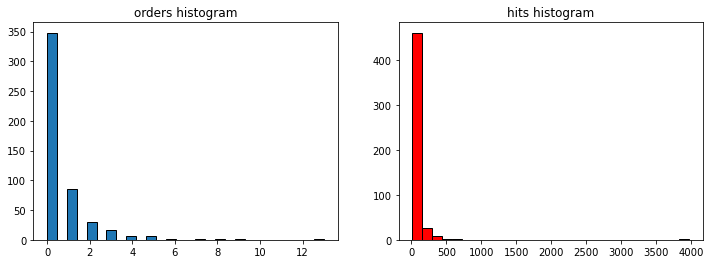

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].hist(df['orders'], bins=28, edgecolor='k')
ax[0].set_title('orders histogram')
    
ax[1].hist(df['hits'], bins=28, color = 'red', edgecolor='k')
ax[1].set_title('hits histogram');

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
temp_df = min_max_scaler.fit_transform(df.drop(['query','orders'],axis=1))
temp_df=pd.DataFrame(temp_df)

In [16]:
temp_df.rename({0:'hits',1:'clicks',2:'clickThroughs',3:'ctr',4:'carts'},axis=1,inplace=True)

### Scatter plot for Linearity check

Orders vs hits


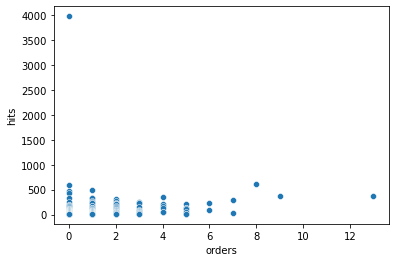

Orders vs clicks


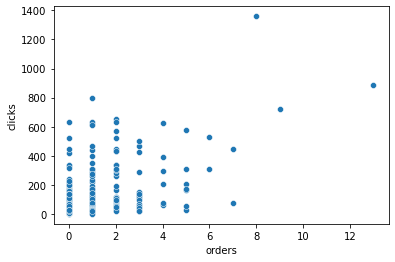

Orders vs clickThroughs


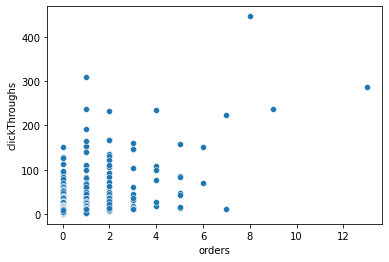

Orders vs ctr


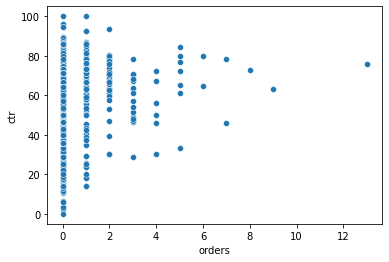

Orders vs carts


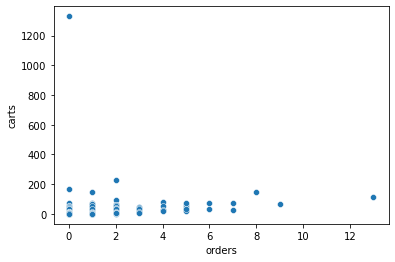

In [17]:
for i in df.columns.drop(['query','orders']):
        print("Orders vs",i)
        sns.scatterplot(data=df,x=df['orders'],y=df[i])
        plt.show()

### Kernel density estimation (KDE)

#### From this we can understand whether we are handling right skewed or left skewed or normalized data

#### So according to that we can make it model ready

<AxesSubplot:xlabel='clicks', ylabel='Density'>

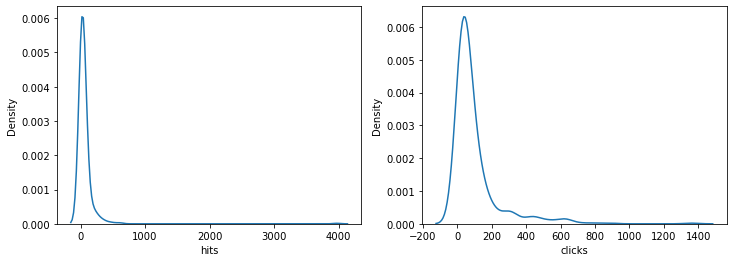

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.kdeplot(df['hits'],ax=ax[0])
sns.kdeplot(df['clicks'],ax=ax[1])

<AxesSubplot:xlabel='ctr', ylabel='Density'>

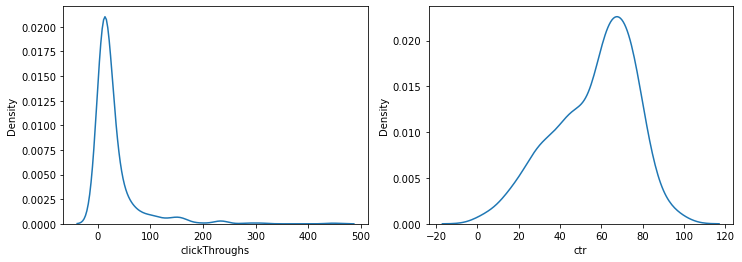

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.kdeplot(df['clickThroughs'],ax=ax[0])
sns.kdeplot(df['ctr'],ax=ax[1])

<AxesSubplot:xlabel='orders', ylabel='Density'>

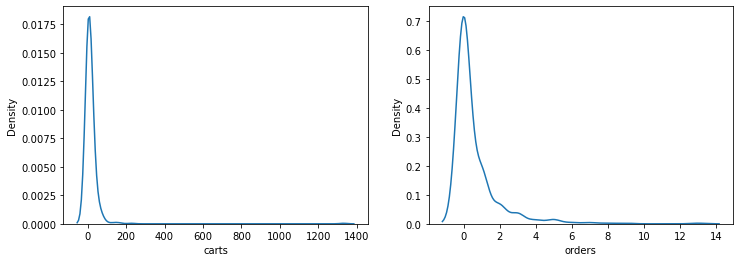

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.kdeplot(df['carts'],ax=ax[0])
sns.kdeplot(df['orders'],ax=ax[1])

### Insights of  "order" is driven since it is the target variable of the dataset

In [21]:
l = []
for i in df['orders'].unique():
    l.append(i)
l.sort()
print('Unique values of order variable of dataset :',l)

Unique values of order variable of dataset : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13]


<AxesSubplot:xlabel='orders', ylabel='count'>

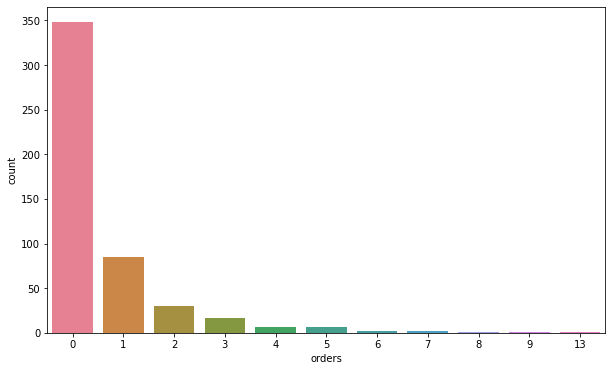

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(df['orders'],palette='husl')

In [23]:
df['orders'].value_counts()

0     348
1      85
2      30
3      17
5       7
4       6
7       2
6       2
8       1
13      1
9       1
Name: orders, dtype: int64

In [24]:
temp_df

,hits,clicks,clickThroughs,ctr,carts
0,1.000000,0.242647,0.208054,0.0234,0.013534
1,0.151125,1.000000,1.000000,0.7304,0.109023
2,0.148345,0.000000,0.000000,0.0000,0.000000
3,0.119282,0.588235,0.693512,0.6379,0.054887
4,0.117766,0.065441,0.062640,0.0583,0.007519
...,...,...,...,...,...
495,0.000000,0.008824,0.013423,0.4286,0.000000
496,0.000000,0.019853,0.015660,0.5000,0.003008
497,0.000000,0.005882,0.008949,0.2857,0.003008
498,0.000000,0.013971,0.011186,0.3571,0.006015


In [25]:
df['orders'] = df['orders'].astype(str)

In [26]:
x = temp_df
y = df['orders']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

### Logistic Regression

In [27]:
model = LogisticRegression(random_state=42)
model.fit(train_x, train_y)

LogisticRegression(random_state=42)

In [28]:
model.score(train_x,train_y)

0.685

In [29]:
model.score(test_x,test_y)

0.78

### Decision Tree Classifier

In [30]:
modeldtc = DecisionTreeClassifier(random_state=42)
modeldtc.fit(train_x,train_y)

DecisionTreeClassifier(random_state=42)

#### Overfitting in this point

In [31]:
modeldtc.score(train_x,train_y)

1.0

In [32]:
modeldtc.score(test_x,test_y)

0.61

### Random Forest Classifier

In [33]:
modelrfc = RandomForestClassifier(max_depth=6, random_state=42)
modelrfc.fit(train_x,train_y)

RandomForestClassifier(max_depth=6, random_state=42)

In [34]:
modelrfc.score(train_x,train_y)

0.8325

In [35]:
modelrfc.score(test_x,test_y)

0.76

### Gradient Boosting Algorithm

In [36]:
modelgbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=12, random_state=0)
modelgbc.fit(train_x, train_y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=12, random_state=0)

In [37]:
modelgbc.score(train_x,train_y)

1.0

In [38]:
modelgbc.score(test_x,test_y)

0.67

### Ada Boost Classifier

In [39]:
modelabc = AdaBoostClassifier(n_estimators=100, random_state=42)
modelabc.fit(train_x,train_y)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [40]:
modelabc.score(train_x,train_y)

0.7

In [41]:
modelabc.score(test_x,test_y)

0.73

### Make predictions

Single Prediction

In [42]:
idx = 438 # random number
single_test_x = [temp_df.iloc[idx].tolist()]
single_test_y = df.iloc[idx]['orders']

In [43]:
single_predictions = modelrfc.predict(single_test_x)
print('For this sample, our model predicted %s and it was actually %s' % (single_predictions[0], single_test_y))

For this sample, our model predicted 0 and it was actually 0


Entire test set

In [44]:
predictions = modelrfc.predict(test_x)

I can create a dataframe to see these in table form:

In [45]:
results_df = pd.DataFrame({
    'true':test_y,
    'predicted':predictions
})
results_df.head(4)

,true,predicted
361,0,0
73,1,1
374,0,0
155,0,0


I can save the model using pickle library to use later in real-time

In [46]:
filename = 'finalized_model.sav'
pickle.dump(modelrfc, open(filename, 'wb'))

## I am very much happy for this opportunity, I have given my best here to present and drive good insights of given dataset